In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import iqr
from sklearn.model_selection import train_test_split

In [ ]:
# Load the train data set
df_train = pd.read_csv('D:\Aman\Machine Learning\PROJECT\Dataset\ctrain.csv')
df_train_label = pd.read_csv('D:\Aman\Machine Learning\PROJECT\Dataset\ctrain_label.csv')
#Load the test data set
df_test = pd.read_csv('D:\Aman\Machine Learning\PROJECT\Dataset\ctest.csv')
df_test_label = pd.read_csv('D:\Aman\Machine Learning\PROJECT\Dataset\ctest_label.csv')

In [ ]:
# Analyze the training and test data set' First Analyze Training Data Set

In [ ]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [ ]:
df_train_label.head()

,504
0,5
1,139
2,209
3,184
4,791


In [ ]:
df_train.shape

(8708, 9)

In [ ]:
df_train_label.shape

(8707, 1)

# Inference:
    # From above it is visualized the train_label dataset has 1 row less.
    # if we minutely observe 1 row is less beacuse train_label dataset do not have heading. 
    # As a next step lets give heading to train_label dataset. 
    # Load train_label dataset without header, and then assign as name to the column.

In [ ]:
df_train_label = pd.read_csv('D:\Aman\Machine Learning\PROJECT\Dataset\ctrain_label.csv', header=None)
cols = ['total_booking']
df_train_label.columns = cols
print('Shape of df_train_label dataset =', df_train_label.shape)
df_train_label.head()

Shape of df_train_label dataset = (8708, 1)


,total_booking
0,504
1,5
2,139
3,209
4,184


In [ ]:
# Since shape of train data set and train_label dataset is same shape.
# Now we can concatenate 2 dataframes

In [ ]:
# TASK 1 "You need to append the train_label dataset to train.csv as ‘total_booking’ column"

In [ ]:
df_train = pd.concat([df_train, df_train_label], axis = 1, ignore_index = False)
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
# Apply same steps as above for test data set except concatenation

In [ ]:
df_test_label = pd.read_csv('D:\Aman\Machine Learning\PROJECT\Dataset\ctest_label.csv', header = None)
colmns = ['total_booking']
df_test_label.columns = colmns
df_test_label.head()

,total_booking
0,256
1,87
2,11
3,84
4,668


In [ ]:
print('df_train data type\n',df_train.dtypes)
print('---------------------------------------')
print('df_test data type\n',df_test.dtypes)
print('---------------------------------------')
print('df_train_shape', df_train.shape)
print('---------------------------------------')
print('df_test_shape',df_test.shape)

df_train data type
 datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
total_booking      int64
dtype: object
---------------------------------------
df_test data type
 datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object
---------------------------------------
df_train_shape (8708, 10)
---------------------------------------
df_test_shape (2178, 9)


In [ ]:
# by seeing the data set it is observed that column season and weather are characters
# There are chances that these characters have white space in begining or last while entry
# Below step will remove any such white spaces before or after the text entries in column weather and season
#Apply this to both the data sets - Test and Train

In [ ]:
df_train['season'] = df_train['season'].str.strip()
df_train['weather'] = df_train['weather'].str.strip()

In [ ]:
df_test['season'] = df_test['season'].str.strip()
df_test['weather'] = df_test['weather'].str.strip()

In [ ]:
# Checking if there is any null value / Dealing with Null values

<AxesSubplot:>

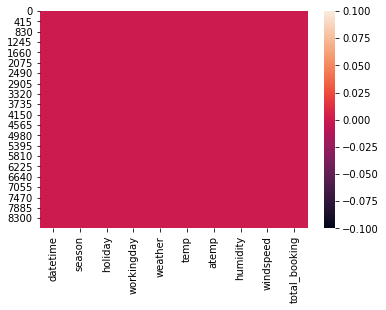

In [ ]:
sns.heatmap(df_train.isnull())

<AxesSubplot:>

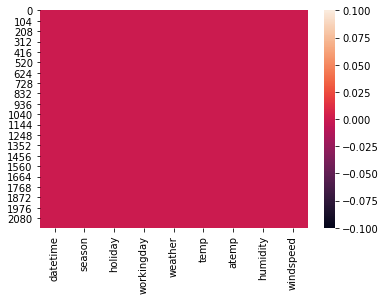

In [ ]:
sns.heatmap(df_test.isnull())

In [ ]:
#Alternative method to check null values
df_train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
dtype: int64

In [ ]:
df_test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [ ]:
# From the above it is infered that datetime is object; season is object; weather is object
# observe keenly data in datetime. It has date and time both. it has format 5/10/2012 11:00
# Now we need to seperate these and ensure date and time are readable in numeric form

In [ ]:
df_train['datetime'] = df_train['datetime'].apply(pd.to_datetime) 
# This will covnert datetime column to format datetime which pandas can recongnize
# Now insert columns
df_train.insert(loc=1,column = 'date', value = df_train.datetime.dt.date)
df_train.insert(loc=2,column = 'hour', value = df_train.datetime.dt.hour)
df_train.insert(loc=3, column = 'weekday', value = df_train.datetime.dt.day_name())
df_train.insert(loc=4, column = 'month', value = df_train.datetime.dt.month)

In [ ]:
df_train.head()

,datetime,date,hour,weekday,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking
0,2012-05-02 19:00:00,2012-05-02,19,Wednesday,5,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,2012-09-05,4,Wednesday,9,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,2011-01-13,9,Thursday,1,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,2011-11-18,16,Friday,11,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,2011-09-13,13,Tuesday,9,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
df_train.drop('datetime', axis = 1, inplace = True)

In [ ]:
df_train.head()

,date,hour,weekday,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking
0,2012-05-02,19,Wednesday,5,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05,4,Wednesday,9,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13,9,Thursday,1,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18,16,Friday,11,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13,13,Tuesday,9,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
# Since in the question it is asked to create a date column hence created above.
# It has no say in prediction and hence dropping the same now

In [ ]:
df_train.drop('date', axis = 1, inplace = True)

In [ ]:
df_train

,hour,weekday,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking
0,19,Wednesday,5,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,4,Wednesday,9,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,9,Thursday,1,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,16,Friday,11,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,13,Tuesday,9,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...,...,...
8703,6,Monday,1,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,1,Thursday,11,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,3,Tuesday,4,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,1,Wednesday,11,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


In [ ]:
# Repeating above steps for test data set

In [ ]:
df_test['datetime'] = df_test['datetime'].apply(pd.to_datetime) 
# This will covnert datetime column to format datetime which pandas can recognize
# Now insert columns
df_test.insert(loc=1,column = 'date', value = df_test.datetime.dt.date)
df_test.insert(loc=2,column = 'hour', value = df_test.datetime.dt.hour)
df_test.insert(loc=3, column = 'weekday', value = df_test.datetime.dt.day_name())
df_test.insert(loc=4, column = 'month', value = df_test.datetime.dt.month)

In [ ]:
df_test.drop(['datetime', 'date'], axis = 1, inplace = True)

In [ ]:
df_test.head()

,hour,weekday,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,11,Thursday,5,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,7,Saturday,6,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,20,Sunday,3,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,11,Thursday,10,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,12,Saturday,6,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [ ]:
print('df_train data type\n',df_train.dtypes)
print('---------------------------------------')
print('df_test data type\n',df_test.dtypes)
print('---------------------------------------')
print('df_train_shape', df_train.shape)
print('---------------------------------------')
print('df_test_shape',df_test.shape)

df_train data type
 hour               int64
weekday           object
month              int64
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
total_booking      int64
dtype: object
---------------------------------------
df_test data type
 hour            int64
weekday        object
month           int64
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object
---------------------------------------
df_train_shape (8708, 12)
---------------------------------------
df_test_shape (2178, 11)


In [ ]:
df_train.nunique()

hour              24
weekday            7
month             12
season             4
holiday            2
workingday         2
weather            4
temp              49
atemp             60
humidity          88
windspeed         28
total_booking    797
dtype: int64

In [ ]:
df_test.nunique()

hour          24
weekday        7
month         12
season         4
holiday        2
workingday     2
weather        3
temp          44
atemp         54
humidity      80
windspeed     24
dtype: int64

In [ ]:
# It is infered from above shape that weather has 3 unique values in test and 4 unique values in train data set
# this will cause issues when we use one hot encoder later in our program.
# Hence it is better to make the unique values same for weather in both the data sets.

In [ ]:
print(df_train['weather'].value_counts())

Clear + Few clouds           5753
Mist + Cloudy                2276
Light Snow, Light Rain        678
Heavy Rain + Thunderstorm       1
Name: weather, dtype: int64


In [ ]:
print(df_test['weather'].value_counts())

Clear + Few clouds        1439
Mist + Cloudy              558
Light Snow, Light Rain     181
Name: weather, dtype: int64


In [ ]:
# From above it is observed that df_train has one addtional entry for weather and count is 1. We can remove that.
# Removing by finding the index and then remove that row

In [ ]:
print(df_train.loc[df_train['weather'] == 'Heavy Rain + Thunderstorm' ])

      hour weekday  month  season  holiday  workingday  \
8109    18  Monday      1  Spring        0           1   

                        weather  temp   atemp  humidity  windspeed  \
8109  Heavy Rain + Thunderstorm   8.2  11.365        86     6.0032   

      total_booking  
8109            164  


In [ ]:
df_train = df_train.drop(labels=8109, axis=0)

In [ ]:
df_train.nunique()

hour              24
weekday            7
month             12
season             4
holiday            2
workingday         2
weather            3
temp              49
atemp             60
humidity          88
windspeed         28
total_booking    797
dtype: int64

In [ ]:
# Unique values less than 25 can be converted into categorical values

In [ ]:
# Converting into categorical type
df_train[['hour', 'weekday','month', 'season', 'holiday', 'workingday', 'weather']] = df_train[['hour', 'weekday','month', 'season', 'holiday', 'workingday', 'weather']].astype('category')
df_test[['hour', 'weekday','month', 'season', 'holiday', 'workingday', 'weather']] = df_test[['hour', 'weekday','month', 'season', 'holiday', 'workingday', 'weather']].astype('category')

In [ ]:
print('df_train data type\n',df_train.dtypes)
print('---------------------------------------')
print('df_test data type\n',df_test.dtypes)
print('---------------------------------------')
print('df_train_shape', df_train.shape)
print('---------------------------------------')
print('df_test_shape',df_test.shape)

df_train data type
 hour             category
weekday          category
month            category
season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
total_booking       int64
dtype: object
---------------------------------------
df_test data type
 hour          category
weekday       category
month         category
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
dtype: object
---------------------------------------
df_train_shape (8707, 12)
---------------------------------------
df_test_shape (2178, 11)


In [ ]:
# Convert categorical values into numeric using label encoder

In [ ]:
le=LabelEncoder()
df_train['hour']=le.fit_transform(df_train['hour'])
df_train['weekday']=le.fit_transform(df_train['weekday'])
df_train['month']=le.fit_transform(df_train['month'])
df_train['season']=le.fit_transform(df_train['season'])
df_train['holiday']=le.fit_transform(df_train['holiday'])
df_train['workingday']=le.fit_transform(df_train['workingday'])
df_train['weather']=le.fit_transform(df_train['weather'])

In [ ]:
print(df_train.shape)
df_train.head()

(8707, 12)


,hour,weekday,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking
0,19,6,4,2,0,1,0,22.14,25.760,77,16.9979,504
1,4,6,8,0,0,1,0,28.70,33.335,79,19.0012,5
2,9,4,0,1,0,1,0,5.74,6.060,50,22.0028,139
3,16,0,10,3,0,1,0,13.94,16.665,29,8.9981,209
4,13,5,8,0,0,1,0,30.34,33.335,51,19.0012,184


In [ ]:
df_test['hour']=le.fit_transform(df_test['hour'])
df_test['weekday']=le.fit_transform(df_test['weekday'])
df_test['month']=le.fit_transform(df_test['month'])
df_test['season']=le.fit_transform(df_test['season'])
df_test['holiday']=le.fit_transform(df_test['holiday'])
df_test['workingday']=le.fit_transform(df_test['workingday'])
df_test['weather']=le.fit_transform(df_test['weather'])

In [ ]:
print(df_test.shape)
df_test.head()

(2178, 11)


,hour,weekday,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,11,4,4,2,0,1,0,21.32,25.000,48,35.0008
1,7,2,5,2,0,0,0,23.78,27.275,64,7.0015
2,20,3,2,1,0,0,1,11.48,12.120,100,27.9993
3,11,4,9,3,0,1,2,25.42,28.790,83,0.0000
4,12,2,5,2,0,0,0,25.42,31.060,43,23.9994


In [ ]:
# Converting categorical fields back to categorical type.

In [ ]:
df_train[['hour', 'weekday','month', 'season', 'holiday', 'workingday', 'weather']] = df_train[['hour', 'weekday','month', 'season', 'holiday', 'workingday', 'weather']].astype('category')

In [ ]:
df_test[['hour', 'weekday','month', 'season', 'holiday', 'workingday', 'weather']] = df_test[['hour', 'weekday','month', 'season', 'holiday', 'workingday', 'weather']].astype('category')

# Analyzing / Visaualizing the Data

In [ ]:
df_train.describe()

,temp,atemp,humidity,windspeed,total_booking
count,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000
mean,20.244403,23.656963,61.646376,12.844676,193.010337
std,7.812877,8.500574,19.198906,8.190456,181.562371
min,0.820000,0.760000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,46.000000,7.001500,43.000000
50%,20.500000,24.240000,61.000000,12.998000,148.000000
75%,26.240000,31.060000,77.000000,16.997900,286.000000
max,41.000000,45.455000,100.000000,56.996900,977.000000


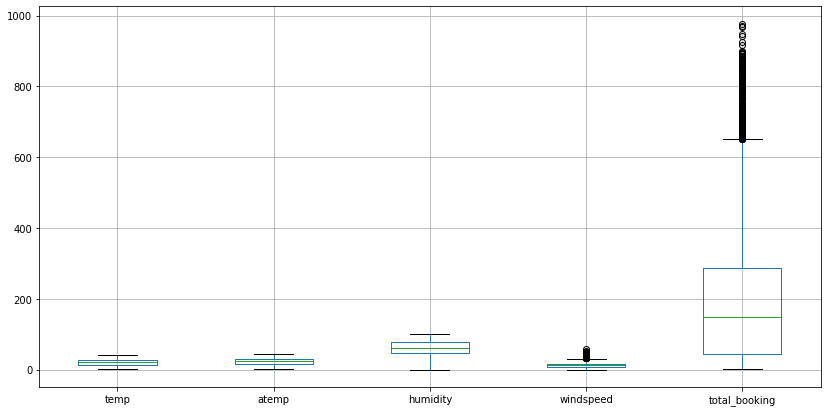

In [ ]:
df_train.boxplot(figsize=(14,7))
plt.show()

In [ ]:
# From the above box plot windspeed and total_booking has lot of outliers. 
# Lets analyze these outliers

<AxesSubplot:xlabel='holiday', ylabel='count'>

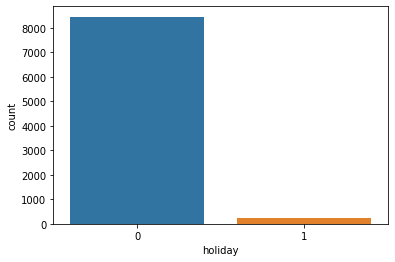

In [ ]:
sns.countplot(x='holiday',data=df_train)

In [ ]:
print(df_train['holiday'].value_counts())

0    8459
1     248
Name: holiday, dtype: int64


In [ ]:
# Value count of no holiday i.e. working day is extremly high. we have seperate column for working day. 
#Hence holiday can be dropped.
df_train.drop(['holiday'],axis=1,inplace = True)

In [ ]:
#Apply same to df_test data
df_test.drop(['holiday'],axis=1,inplace = True)

<AxesSubplot:xlabel='workingday', ylabel='count'>

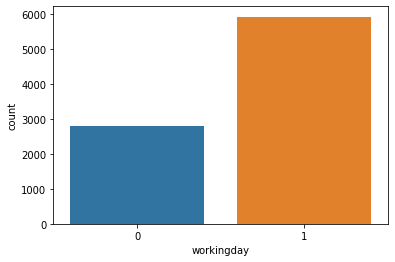

In [ ]:
sns.countplot(x='workingday',data=df_train)

In [ ]:
print(df_train['workingday'].value_counts())

1    5923
0    2784
Name: workingday, dtype: int64


<AxesSubplot:xlabel='weather', ylabel='count'>

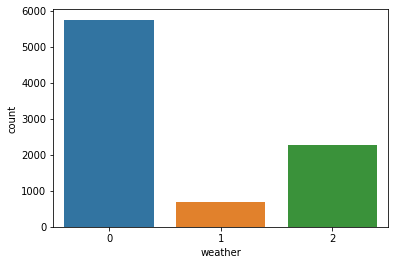

In [ ]:
sns.countplot(x='weather',data=df_train)

In [ ]:
print(df_train['weather'].value_counts())

0    5753
2    2276
1     678
Name: weather, dtype: int64


<AxesSubplot:xlabel='windspeed'>

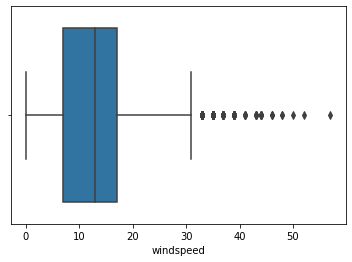

In [ ]:
sns.boxplot(x=df_train['windspeed'])

<AxesSubplot:xlabel='total_booking'>

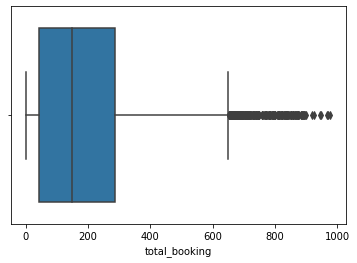

In [ ]:
sns.boxplot(x=df_train['total_booking'])

<AxesSubplot:xlabel='humidity'>

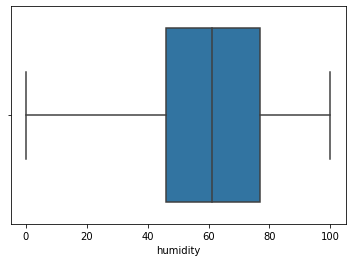

In [ ]:
sns.boxplot(x=df_train['humidity'])

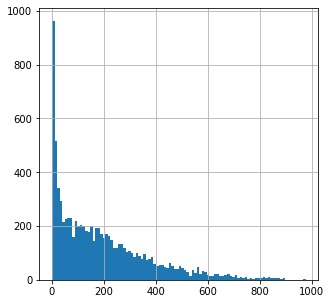

In [ ]:
df_train['total_booking'].hist(bins=100,figsize=(5,5))
plt.show()

In [ ]:
# We can see the data of total booking is highley skewed. Postive skewed

In [ ]:
df_train.skew(axis = 0, skipna = True, numeric_only = True )

temp            -0.000045
atemp           -0.110633
humidity        -0.080226
windspeed        0.565426
total_booking    1.237808
dtype: float64

# Treating the outliers

# Here we copy the data set df_train to df1

In [ ]:
df1= df_train

# Treating with IQR Method and dropping the outlier rows

(8465, 11)

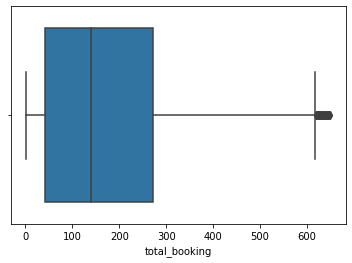

In [ ]:
Q1 = df1.total_booking.quantile(0.25)
Q3 = df1.total_booking.quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
df1 = df1[~((df1.total_booking<lower_fence) | (df1.total_booking>upper_fence))]
sns.boxplot(x=df1['total_booking'])
df1.shape

(8409, 11)

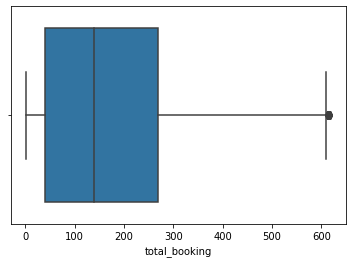

In [ ]:
Q1 = df1.total_booking.quantile(0.25)
Q3 = df1.total_booking.quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
df1 = df1[~((df1.total_booking<lower_fence) | (df1.total_booking>upper_fence))]
sns.boxplot(x=df1['total_booking'])
df1.shape

(8392, 11)

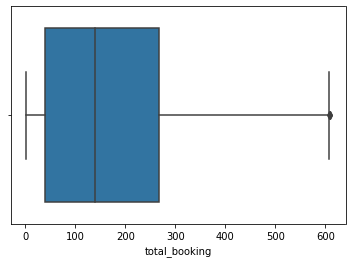

In [ ]:
Q1 = df1.total_booking.quantile(0.25)
Q3 = df1.total_booking.quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
df1 = df1[~((df1.total_booking<lower_fence) | (df1.total_booking>upper_fence))]
sns.boxplot(x=df1['total_booking'])
df1.shape

(8389, 11)

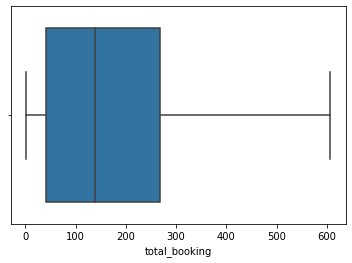

In [ ]:
Q1 = df1.total_booking.quantile(0.25)
Q3 = df1.total_booking.quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
df1 = df1[~((df1.total_booking<lower_fence) | (df1.total_booking>upper_fence))]
sns.boxplot(x=df1['total_booking'])
df1.shape

(8215, 11)

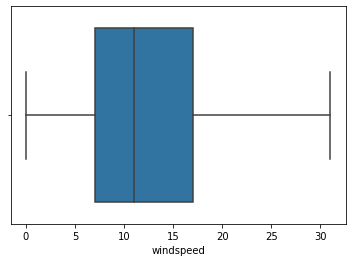

In [ ]:
cols = ['windspeed']
Q1 = df1[cols].quantile(0.25)
Q3 = df1[cols].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1[cols] < (Q1 - 1.5*IQR)) |(df1[cols] > (Q3 + 1.5*IQR))).any(axis=1)]
sns.boxplot(x=df1['windspeed'])
df1.shape

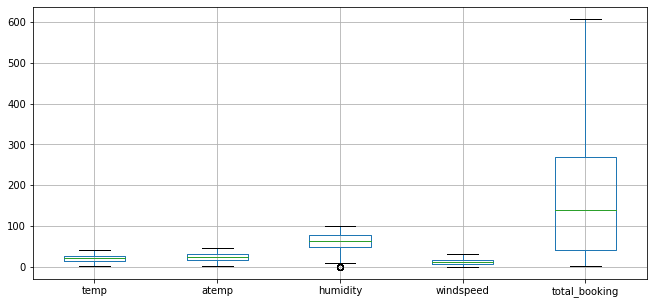

In [ ]:
df1.boxplot(figsize=(11,5))
plt.show()

In [ ]:
# Now humidty is showing some data as outlier. Lets treat humidity column now and remove outlier

(8198, 11)

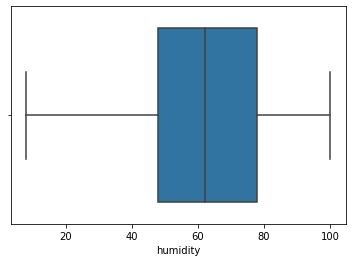

In [ ]:
cols = ['humidity']
Q1 = df1[cols].quantile(0.25)
Q3 = df1[cols].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1[cols] < (Q1 - 1.5*IQR)) |(df1[cols] > (Q3 + 1.5*IQR))).any(axis=1)]
sns.boxplot(x=df1['humidity'])
df1.shape

In [ ]:
df_train_clean = df1

In [ ]:
df_train_clean.dtypes

hour             category
weekday          category
month            category
season           category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
total_booking       int64
dtype: object

In [ ]:
df_train_clean.shape

(8198, 11)

In [ ]:
df_test.dtypes

hour          category
weekday       category
month         category
season        category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
dtype: object

In [ ]:
df_test.shape

(2178, 10)

# Plot the corrlelation

<AxesSubplot:>

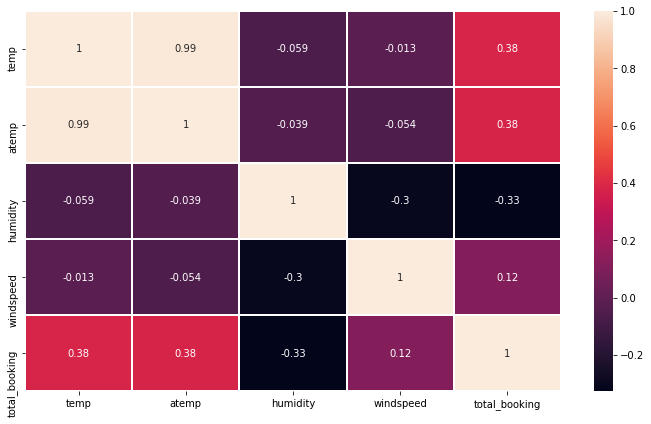

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(df_train_clean.corr(),annot=True, linewidth =1)

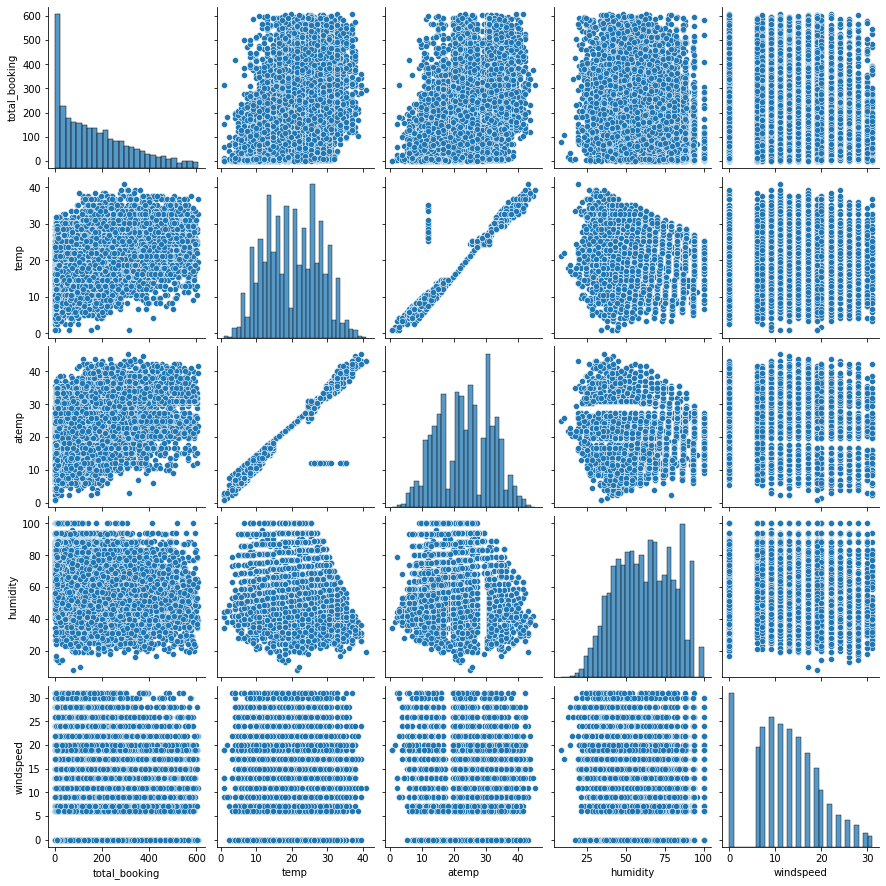

In [ ]:
# Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity", "windspeed"]
df_plot = df_train_clean[['total_booking', 'temp', 'atemp', 'humidity', 'windspeed' ]]
sns.pairplot(df_plot, kind = "scatter")
plt.show()

<AxesSubplot:xlabel='total_booking'>

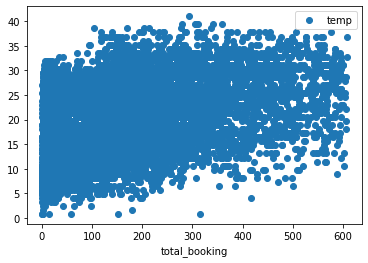

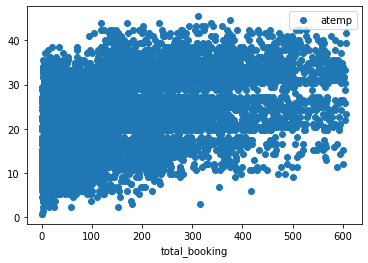

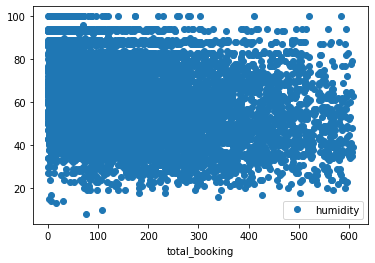

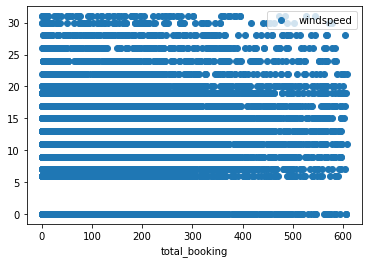

In [ ]:
# Drawing indiviudal plots as asked in question
df_train_clean.plot(x='total_booking', y='temp', style='o')
df_train_clean.plot(x='total_booking', y='atemp', style='o')
df_train_clean.plot(x='total_booking', y='humidity', style='o')
df_train_clean.plot(x='total_booking', y='windspeed', style='o')

# From pair plot and various scatter plots it is inferred that total booking is coreralted to temp. With humidity and windspeed there is not much effect on total number of bookings

In [ ]:
# Perform Data Visualization
#a. Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well
#b. Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)
#c. Use Histograms to plot all the continuous variables present in the data

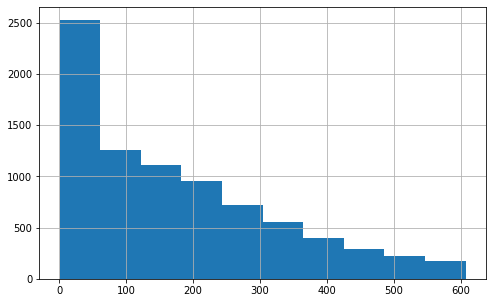

In [ ]:
# Draw normal distribution for total_booking
df_train_clean['total_booking'].hist(bins=10,figsize=(8,5))
plt.show()

[Text(0.5, 0, 'bookings numbers'), Text(0, 0.5, 'bookings freq')]

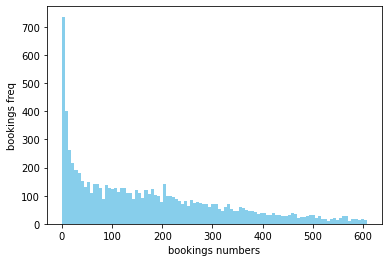

In [ ]:
ax = sns.distplot(df_train_clean['total_booking'],
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='bookings numbers', ylabel='bookings freq')

# Visualize total_booking vs (Month, Season, Hour, Weekday)

<AxesSubplot:xlabel='month', ylabel='total_booking'>

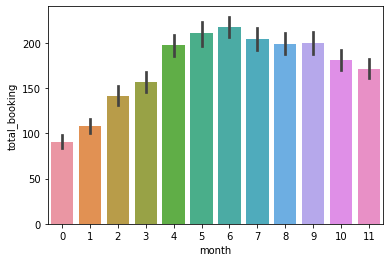

In [ ]:
sns.barplot(x='month', y='total_booking', data = df_train_clean)

In [ ]:
# It is inferred that during Jan, feb and march demand is less as compared to other months

<AxesSubplot:xlabel='hour', ylabel='total_booking'>

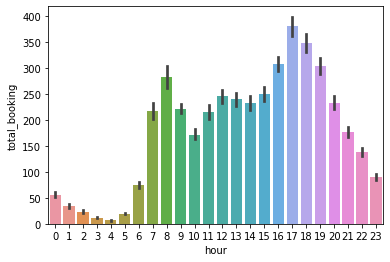

In [ ]:
sns.barplot(x='hour', y='total_booking', data = df_train_clean)

In [ ]:
# From the above it can be inferred that during office going and leaving hours demand for the cabs is more

<AxesSubplot:xlabel='season', ylabel='total_booking'>

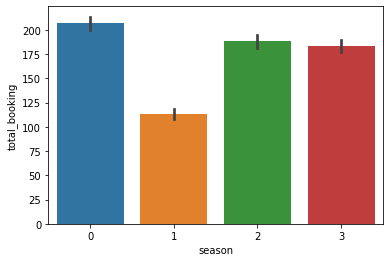

In [ ]:
sns.barplot(x='season', y='total_booking', data = df_train_clean)

In [ ]:
# Demand for cab for all seasons is almost similar

<AxesSubplot:xlabel='weekday', ylabel='total_booking'>

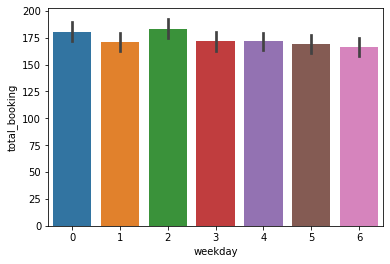

In [ ]:
sns.barplot(x='weekday', y='total_booking', data = df_train_clean)

In [ ]:
# Demand for the cab during entire week is similar

<AxesSubplot:xlabel='workingday', ylabel='total_booking'>

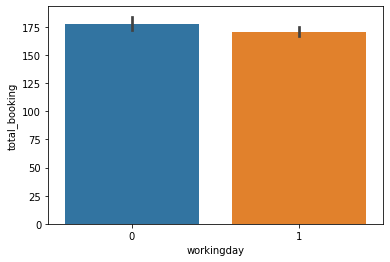

In [ ]:
sns.barplot(x='workingday', y='total_booking', data = df_train_clean)

# Drawing histograms on continuous variable in the df_train_clean

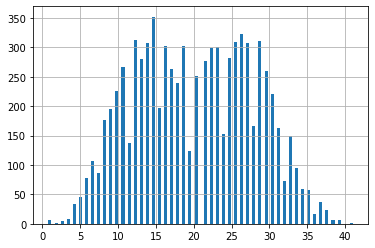

In [ ]:
df_train_clean['temp'].hist(bins=100,figsize=(6,4))
plt.show()

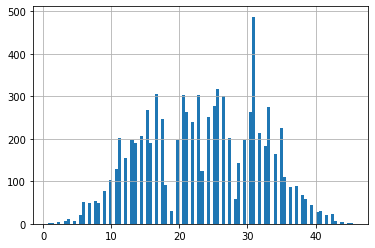

In [ ]:
df_train_clean['atemp'].hist(bins=100,figsize=(6,4))
plt.show()

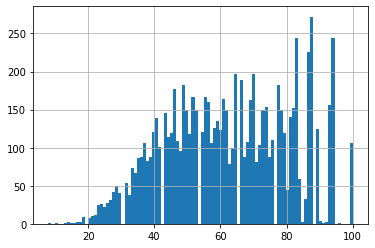

In [ ]:
df_train_clean['humidity'].hist(bins=100,figsize=(6,4))
plt.show()

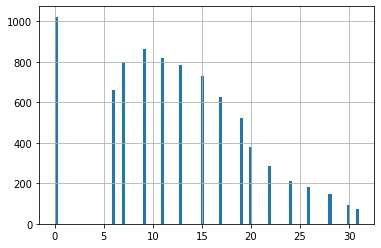

In [ ]:
df_train_clean['windspeed'].hist(bins=100,figsize=(6,4))
plt.show()

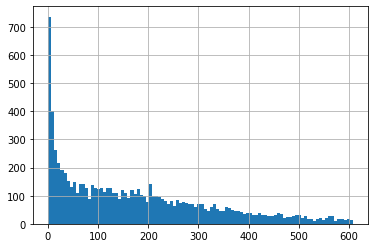

In [ ]:
df_train_clean['total_booking'].hist(bins=100,figsize=(6,4))
plt.show()

In [ ]:
df_train_clean.shape

(8198, 11)

In [ ]:
df_train_clean.dtypes

hour             category
weekday          category
month            category
season           category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
total_booking       int64
dtype: object

In [ ]:
df_test.shape

(2178, 10)

In [ ]:
df_test.dtypes

hour          category
weekday       category
month         category
season        category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
dtype: object

# ################################################################

# Apply Onehot encoder on categorical data

In [ ]:
df_train_clean_ohe= df_train_clean

In [ ]:
#Define categorical columns
categorical_cols = ['hour', 'weekday', 'month', 'season', 'workingday', 'weather']
# creating one hot encoder object 
ohe = OneHotEncoder()
#One-hot-encode the categorical columns.#Unfortunately output is an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(df_train_clean_ohe[categorical_cols]).toarray()

In [ ]:
#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index = df_train_clean_ohe.index)
data_hot_encoded

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8705,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8706,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#Extract only the columns that didnt need to be encoded
data_other_cols = df_train_clean.drop(columns= categorical_cols)
#Concatenate the two dataframes : 
df_train_clean_ohe = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
df_train_clean_ohe

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,temp,atemp,humidity,windspeed,total_booking
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,22.14,25.760,77,16.9979,504
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,28.70,33.335,79,19.0012,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,5.74,6.060,50,22.0028,139
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,13.94,16.665,29,8.9981,209
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,4.10,6.820,54,6.0032,13
8704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,16.40,20.455,87,0.0000,11
8705,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,23.78,27.275,56,8.9981,1
8706,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,11.48,13.635,61,16.9979,92


In [ ]:
# Applying One HOt Encoder scheme to df_test

In [ ]:
df_test_ohe= df_test

In [ ]:
#Define categorical columns
categorical_cols = ['hour', 'weekday', 'month', 'season', 'workingday', 'weather']
# creating one hot encoder object 
ohe = OneHotEncoder()
#One-hot-encode the categorical columns.#Unfortunately output is an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(df_test_ohe[categorical_cols]).toarray()

In [ ]:
#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index = df_test_ohe.index)
data_hot_encoded

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2176,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
#Extract only the columns that didnt need to be encoded
data_other_cols = df_test.drop(columns= categorical_cols)
#Concatenate the two dataframes : 
df_test_ohe = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
df_test_ohe

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,temp,atemp,humidity,windspeed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,21.32,25.000,48,35.0008
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,23.78,27.275,64,7.0015
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,11.48,12.120,100,27.9993
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,25.42,28.790,83,0.0000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,25.42,31.060,43,23.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,18.86,22.725,63,26.0027
2174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,13.94,17.425,81,7.0015
2175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,18.86,22.725,59,19.9995
2176,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,17.22,21.210,94,8.9981


# Now we can split the dataset into a training set and a testing set. 

In [ ]:
# Import library  - Done on top
# define your X and y
# split the data using train_test_split

In [ ]:
X = df_train_clean.iloc[:, :-1]
y = df_train_clean.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 7)
print("Training Feature Shape = Shape of X_train :", X_train.shape)
print("Training Label Shape = Shape of y_train :", y_train.shape)
print("Testing feature shape =Shape of X_test :", X_test.shape)
print("Testing Label Shape = Shape of y_test :", y_test.shape)

Training Feature Shape = Shape of X_train : (6558, 10)
Training Label Shape = Shape of y_train : (6558,)
Testing feature shape =Shape of X_test : (1640, 10)
Testing Label Shape = Shape of y_test : (1640,)


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Fit various models
     # Random Forest Regressor
     # Ada Boost Regressor 
     # Bagging Regressor
     # SVR, and 
     # K-Neighbors Regressor

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 10,random_state = 0)
regressor_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
# Our model is ready! Make predictions on test data using the model trained on original data
train_rf_pred = regressor_rf.predict(X_train)
test_rf_pred = regressor_rf.predict(X_test)

In [ ]:
# Evaluate the model (#errors = abs(y_pred - y_test))
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("mean absolute error of our model is:", mean_absolute_error(y_test,test_rf_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,test_rf_pred, squared = False))

mean absolute error of our model is: 42.82029979674797
root mean squared error of our model is: 64.21238262484438


# Decision Tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state=1, max_depth = 6)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=1)

In [ ]:
# Our model is ready! Make predictions on test data using the model trained on original data
train_dt_pred = regressor_dt.predict(X_train)
test_dt_pred = regressor_dt.predict(X_test)

In [ ]:
# Evaluate the model #errors = abs(y_pred - y_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("mean absolute error of our model is:", mean_absolute_error(y_test,test_dt_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,test_dt_pred, squared = False))

mean absolute error of our model is: 54.3214870453534
root mean squared error of our model is: 80.0701747397793


# AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
be = DecisionTreeRegressor(max_depth=2) # be = base estimator
regressor_abr = AdaBoostRegressor(base_estimator=be, n_estimators= 100, random_state=1)
regressor_abr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  n_estimators=100, random_state=1)

In [ ]:
# Our model is ready! Make predictions on test data using the model trained on original data
train_abg_pred = regressor_abr.predict(X_train)
test_abg_pred = regressor_abr.predict(X_test)

In [ ]:
# Evaluate the model #errors = abs(y_pred - y_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("mean absolute error of our model is:", mean_absolute_error(y_test,test_abg_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,test_abg_pred, squared = False))

mean absolute error of our model is: 79.76885980134603
root mean squared error of our model is: 104.33648866142602


# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5) # n_neighbours default value is 5
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Our model is ready! Make predictions on test data using the model trained on original data
train_knn_pred = knn.predict(X_train)
test_knn_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("mean absolute error of our model is:", mean_absolute_error(y_test,test_knn_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,test_knn_pred,squared=False))

mean absolute error of our model is: 67.37451219512195
root mean squared error of our model is: 95.39535257381738


# SV Regressor

In [ ]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel='rbf')
regressor_svr.fit(X_train,y_train)

SVR()

In [ ]:
# Our model is ready! Make predictions on test data using the model trained on original data
train_svr_pred = regressor_svr.predict(X_train)
test_svr_pred = regressor_svr.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("mean absolute error of our model is:", mean_absolute_error(y_test,test_svr_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,test_svr_pred,squared=False))

mean absolute error of our model is: 85.56948240570595
root mean squared error of our model is: 121.87546789611704


# Logistic Regression

In [ ]:
from sklearn.linear_model import  LogisticRegression
lr=LogisticRegression(solver='lbfgs', max_iter=100)
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Our model is ready! Make predictions on test data using the model trained on original data
train_lr_pred = lr.predict(X_train)
test_lr_pred = lr.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("mean absolute error of our model is:", mean_absolute_error(y_test,test_lr_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,test_lr_pred,squared=False))

mean absolute error of our model is: 88.88231707317073
root mean squared error of our model is: 133.29742783824707


# Bagging Regressor

In [ ]:
# Bagging Regressor using base estimator Decision Tree; # base estimator as random forest yeild high RMSE. Hence trying DT.

In [ ]:
from sklearn.ensemble import BaggingRegressor
be = DecisionTreeRegressor(random_state=1, max_depth = 10)
bgr = BaggingRegressor(base_estimator= be, n_estimators=100)
bgr.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                      random_state=1),
                 n_estimators=100)

In [ ]:
train_bagdtr_pred = bgr.predict(X_train)
test_bagdtr_pred = bgr.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("mean absolute error of our model is:", mean_absolute_error(y_test,test_bagdtr_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,test_bagdtr_pred,squared=False))

mean absolute error of our model is: 42.68634871888825
root mean squared error of our model is: 62.07137529055859


# Lets tune Bagging Regressor since this the best performing model

In [ ]:
# Apply GridSearchCV on Bagging Regressor as this has least RMSE

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'base_estimator__max_depth' : [30,50,100],
    'n_estimators': [100,200,500],
    'max_samples' : [0.2, 0.5, 0.6]
}

In [ ]:
gs_rgr = GridSearchCV(BaggingRegressor(DecisionTreeRegressor()),param_grid, verbose=2, cv = 3)
gs_rgr.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END base_estimator__max_depth=30, max_samples=0.2, n_estimators=100; total time=   0.6s
[CV] END base_estimator__max_depth=30, max_samples=0.2, n_estimators=100; total time=   0.6s
[CV] END base_estimator__max_depth=30, max_samples=0.2, n_estimators=100; total time=   0.6s
[CV] END base_estimator__max_depth=30, max_samples=0.2, n_estimators=200; total time=   1.3s
[CV] END base_estimator__max_depth=30, max_samples=0.2, n_estimators=200; total time=   1.3s
[CV] END base_estimator__max_depth=30, max_samples=0.2, n_estimators=200; total time=   1.3s
[CV] END base_estimator__max_depth=30, max_samples=0.2, n_estimators=500; total time=   3.7s
[CV] END base_estimator__max_depth=30, max_samples=0.2, n_estimators=500; total time=   3.4s
[CV] END base_estimator__max_depth=30, max_samples=0.2, n_estimators=500; total time=   3.3s
[CV] END base_estimator__max_depth=30, max_samples=0.5, n_estimators=100; total time=   1.1s
[CV] END 

GridSearchCV(cv=3,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'base_estimator__max_depth': [30, 50, 100],
                         'max_samples': [0.2, 0.5, 0.6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
gs_rgr.best_params_

{'base_estimator__max_depth': 30, 'max_samples': 0.6, 'n_estimators': 500}

In [ ]:
train_gscv_pred = gs_rgr.predict(X_train)
test_gscv_pred = gs_rgr.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("mean absolute error of our model is:", mean_absolute_error(y_test,test_gscv_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,test_gscv_pred,squared=False))

mean absolute error of our model is: 40.789610975609754
root mean squared error of our model is: 60.02150391704317


# Perform prediction on the original test set (df_test) and print the mean_squared_log_error

In [ ]:
y_pred = gs_rgr.predict(df_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
print("root mean squared error of our model is:", mean_squared_error(df_test_label, y_pred,squared=False))
print("root mean squared log error of our model is:", np.sqrt(mean_squared_log_error(df_test_label, y_pred)))

root mean squared error of our model is: 192.58861022681114
root mean squared log error of our model is: 1.501833652921235


In [ ]:
y_pred_ohe = gs_rgr.predict(df_test_ohe)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
print("root mean squared error of our model is:", mean_squared_error(df_test_label, y_pred_ohe,squared=False))
print("root mean squared log error of our model is:", np.sqrt(mean_squared_log_error(df_test_label, y_pred_ohe)))

root mean squared error of our model is: 193.10004072089518
root mean squared log error of our model is: 1.6261354526385903


#                                         SUMMARY


### This project is about creating a model to predict the taxi demand at particular hour. 
#### We have been provided with test and train data set. 
#### Objective of the project is to create a best model and apply on the test data set.
#### We started the project with importing libraries for test and train data set. Checking the labels of data set.
#### After this we loaded test and train data set and applied the feature engineering on both data sets equally to ensure model created, will be applied on test data set without any issues. 
####  We merged train data set and train label to make it 01 data set. We didn't merge test data set and test label becuse once we get best fit model we need to test it with test label.
#### We indentifed number of unique values in the column labels and then columns with less than 25 unique values converted into categorical values.

#### After converting into categorical values we applied label encoder to convert the values into numeric. This is applied on both train (merged train + train label) data set and on test data set.

#### After that we performed data visualization and also identifed the outliers. We treated outliers using IQR methodology. One unique thing I identifed that I need to apply IQR multiple times to treat the total booking label outliers. 

#### After treating the outliers we applied one hot encoder on train and test data set.

#### After applying one hot encoder we applied X, y train split model and then standard scaler is applied and X-Train and x-test as we are working on multiple regression models. It will be easy to compare.

#### After this we applied various regressor models and compared the RMSE values of each model

#### After identifying the best model with least RMSE we applied grid search CV regressor model to get the best values for the model.

#### Once the best model is created we applied it on test data set or test one hot encoded data set to get the y prediction. 

#### The y prediction is compared with test label and RMSLE is calculated. 

#### Here we identifed the bagging regressor is the best model as it provided least RMSE as comapred to other models.

# End